## INTEGRANTES


  Luis F. Amado Rangel

  Emmanuel Branch Pérez

  Luis S. Duque Franco

  Harold E. Quetama Benavides

  Danna S. Tarazona Turriago

#DESCRIPCIÓN

¿Qué es la neumonía?

<p style="text-align: justify; width: 100%">
La neumonía es una infección que inflama los sacos aéreos de uno o ambos pulmones. Los sacos aéreos se pueden llenar de líquido o pus , lo que provoca tos con flema o pus, fiebre, escalofríos y dificultad para respirar. Diversos microorganismos, como bacterias, virus y hongos, pueden provocar neumonía. La neumonía puede variar en gravedad desde suave a potencialmente mortal.
</p>

Síntomas

Los signos y síntomas moderados suelen ser similares a los de un resfriado o una gripe, pero duran más tiempo Puede que los recién nacidos y bebés no muestran signos de estar sufriendo la infección. O bien, pueden vomitar, tener fiebre y tos, parecer inquietos o cansados y sin energía, o presentar dificultad para respirar y comer.


#PREGUNTAS

¿Por qué? En las páginas de UNICEF, OMS, y MedlinePLus (Página autorizada por el gobierno de Estados Unidos) muestran su desconcierto por el alto índice de muertes de niños menores de 5 años a causa de la pulmonía. Según UNICEF: “Cada año mueren más de 725.000 niños menores de cinco años de neumonía, de los cuales alrededor de 190.000 son recién nacidos, un grupo especialmente vulnerable a la infección”. Pero ¿Cómo se diagnostica? Según MedlinePlus luego de un análisis previo, si el médico lo considera pertinente enviará una radiografía torácica. He ahí, el por qué de analizar el problema desde la visión artificial. Puede automatizarse el proceso para lograr un análisis rápido del paciente sin necesidad de que un doctor espere los resultados y deba analizarlos, donde el factor humano puede afectar el proceso de revisión. Se gana tiempo y se salvan más vidas.

¿Cómo? Para la interpretación de la radiografía esta debe tener una calidad de imagen suficiente e incluir las regiones supraclaviculares y la totalidad de las regiones diafragmáticas para hacer un diagnóstico. Además, estar con una adecuada colimación, es decir, delimitar y ajustar el campo de radiación que se utilizará durante el estudio, proporcionando así información detallada de toda la zona y permitiendo clasificarla bien. Posteriormente se procede a transformar las imágenes en diferentes espacios de color y analizar la información que se puede extraer de las imágenes de cada canal analizado, y estudiar más a fondo sus respectivos histogramas para un mejor análisis.

¿Para qué? Se quiere entrenar un programa de visión artificial para su correcta implementación en un diagnóstico temprano de Neumonía en pacientes en edad infantil, con la finalidad de poder usarse en ámbitos académicos y/o profesionales, por ejemplo, como una ayuda en el proceso de remisión a especialistas en citas de primer acercamiento con médico general.


#OBJETIVOS

1. Seleccionar y clasificar radiografías torácicas a través del uso de la IA.

2. Analizar diferentes tipos de Rayos-X que permitan identificar signos de neumonía.


#Adquisición de la Imagen

## Dataset:
Imágenes de radiografía de tórax de la unidad pediátrica,  mujeres  y niños, centro médico de Guangzhou en china, donde las imágenes han sido catalogados inicialmente por un experto y luego redefinida por otro profesional en el campo.
Está conformado por 3 carpetas (train, test, val) cada una contiene las imágenes categorizadas en normal o neumonía, en total son 5863 imágenes en formato JPEG , de diversas dimensiones desde (440px,944px) hasta (1080, 1288) en un solo canal en escala de grises.



tomado de https://data.mendeley.com/datasets/rscbjbr9sj/2
Kermany, Daniel; Zhang, Kang; Goldbaum, Michael (2018), “Labeled Optical Coherence Tomography (OCT) and Chest X-Ray Images for Classification”, Mendeley Data, V2, doi: 10.17632/rscbjbr9sj.2


In [40]:
!pip install scikit-image

In [41]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/12 semestre/Vision Artificial/actividades/Proyecto VA/chest_xray" #

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Normal vs Neumonía

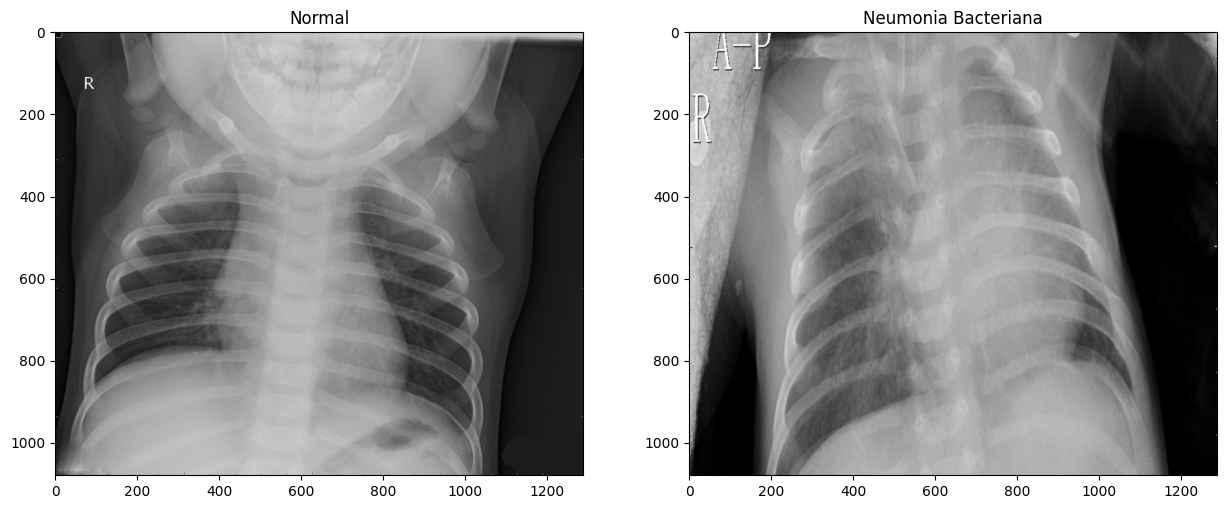

In [43]:
#Leemos las imágenes de las carpetas NORMAL y PNEUMONIA de train
img_normal= cv2.imread(path+"/train/NORMAL/NORMAL2-IM-1385-0001.jpeg",cv2.IMREAD_GRAYSCALE)

img_neu= cv2.imread(path+"/train/PNEUMONIA/person1617_bacteria_4255.jpeg",cv2.IMREAD_GRAYSCALE)
img_neu = cv2.resize(img_neu, (img_normal.shape[1], img_normal.shape[0]),cv2.INTER_NEAREST)
#Hacemos un subplot de ambas imágenes
def comparar(img1,img2):
  fig , axs = plt.subplots(1,2,figsize=(15,15))
  axs[0].imshow(img1,cmap='gray')
  axs[0].set_title("Normal")
  axs[1].imshow(img2,cmap='gray')
  axs[1].set_title("Neumonia Bacteriana")
comparar(img_normal,img_neu)

# PREPROCESAMIENTO DE LA IMAGEN

In [44]:
def gamma_correction(img, a, gamma):

    #Crear copia de la imagen tipo flotante dada la normalización
    img_copy = img.copy().astype(np.float32)/255.0
    #La función corrección gamma es de la forma ax^gamma, donde x es la imagen de entrada
    res_gamma = cv2.pow(img_copy,gamma)
    res = cv2.multiply(res_gamma, a)

    #Asegurar que la los datos queden entre 0 y 255 y sean uint8
    res[res<0] = 0
    res = res*255.0
    res[res>255] = 255

    res = res.astype(np.uint8)

    return res

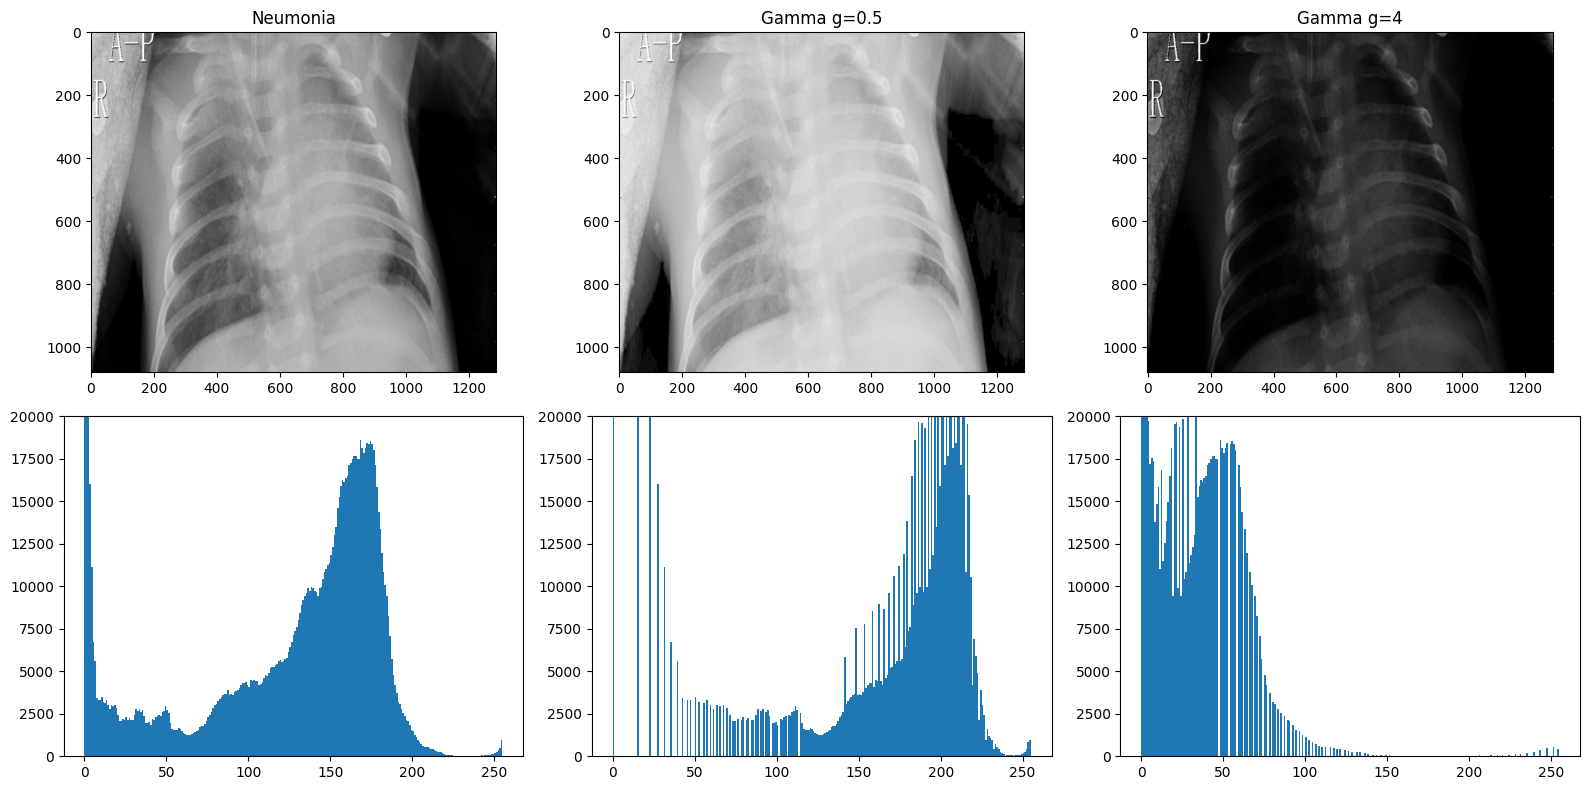

In [45]:

# Función para mostrar las imágenes y sus histogramas
def histograma(img_neu):
    img_gamma_05, img_gamma_4 = gamma_correction(img_neu, 1,0.5), gamma_correction(img_neu, 1,4)
    fig, axs = plt.subplots(2, 3, figsize=(16, 8))

    # Mostrar imágenes originales y filtradas
    for i, (img, title) in enumerate(zip([img_neu, img_gamma_05, img_gamma_4],
                                         ["Neumonia", "Gamma g=0.5", "Gamma g=4"])):
        axs[0, i].imshow(img, cmap='gray'); axs[0, i].set_title(title)
        axs[1, i].hist(img.ravel(), bins=255); axs[1, i].set_ylim([0, 20000])

    plt.tight_layout(); plt.show()

# Llamar a la función de histogramas
histograma(img_neu)

## Binarización por tresholding

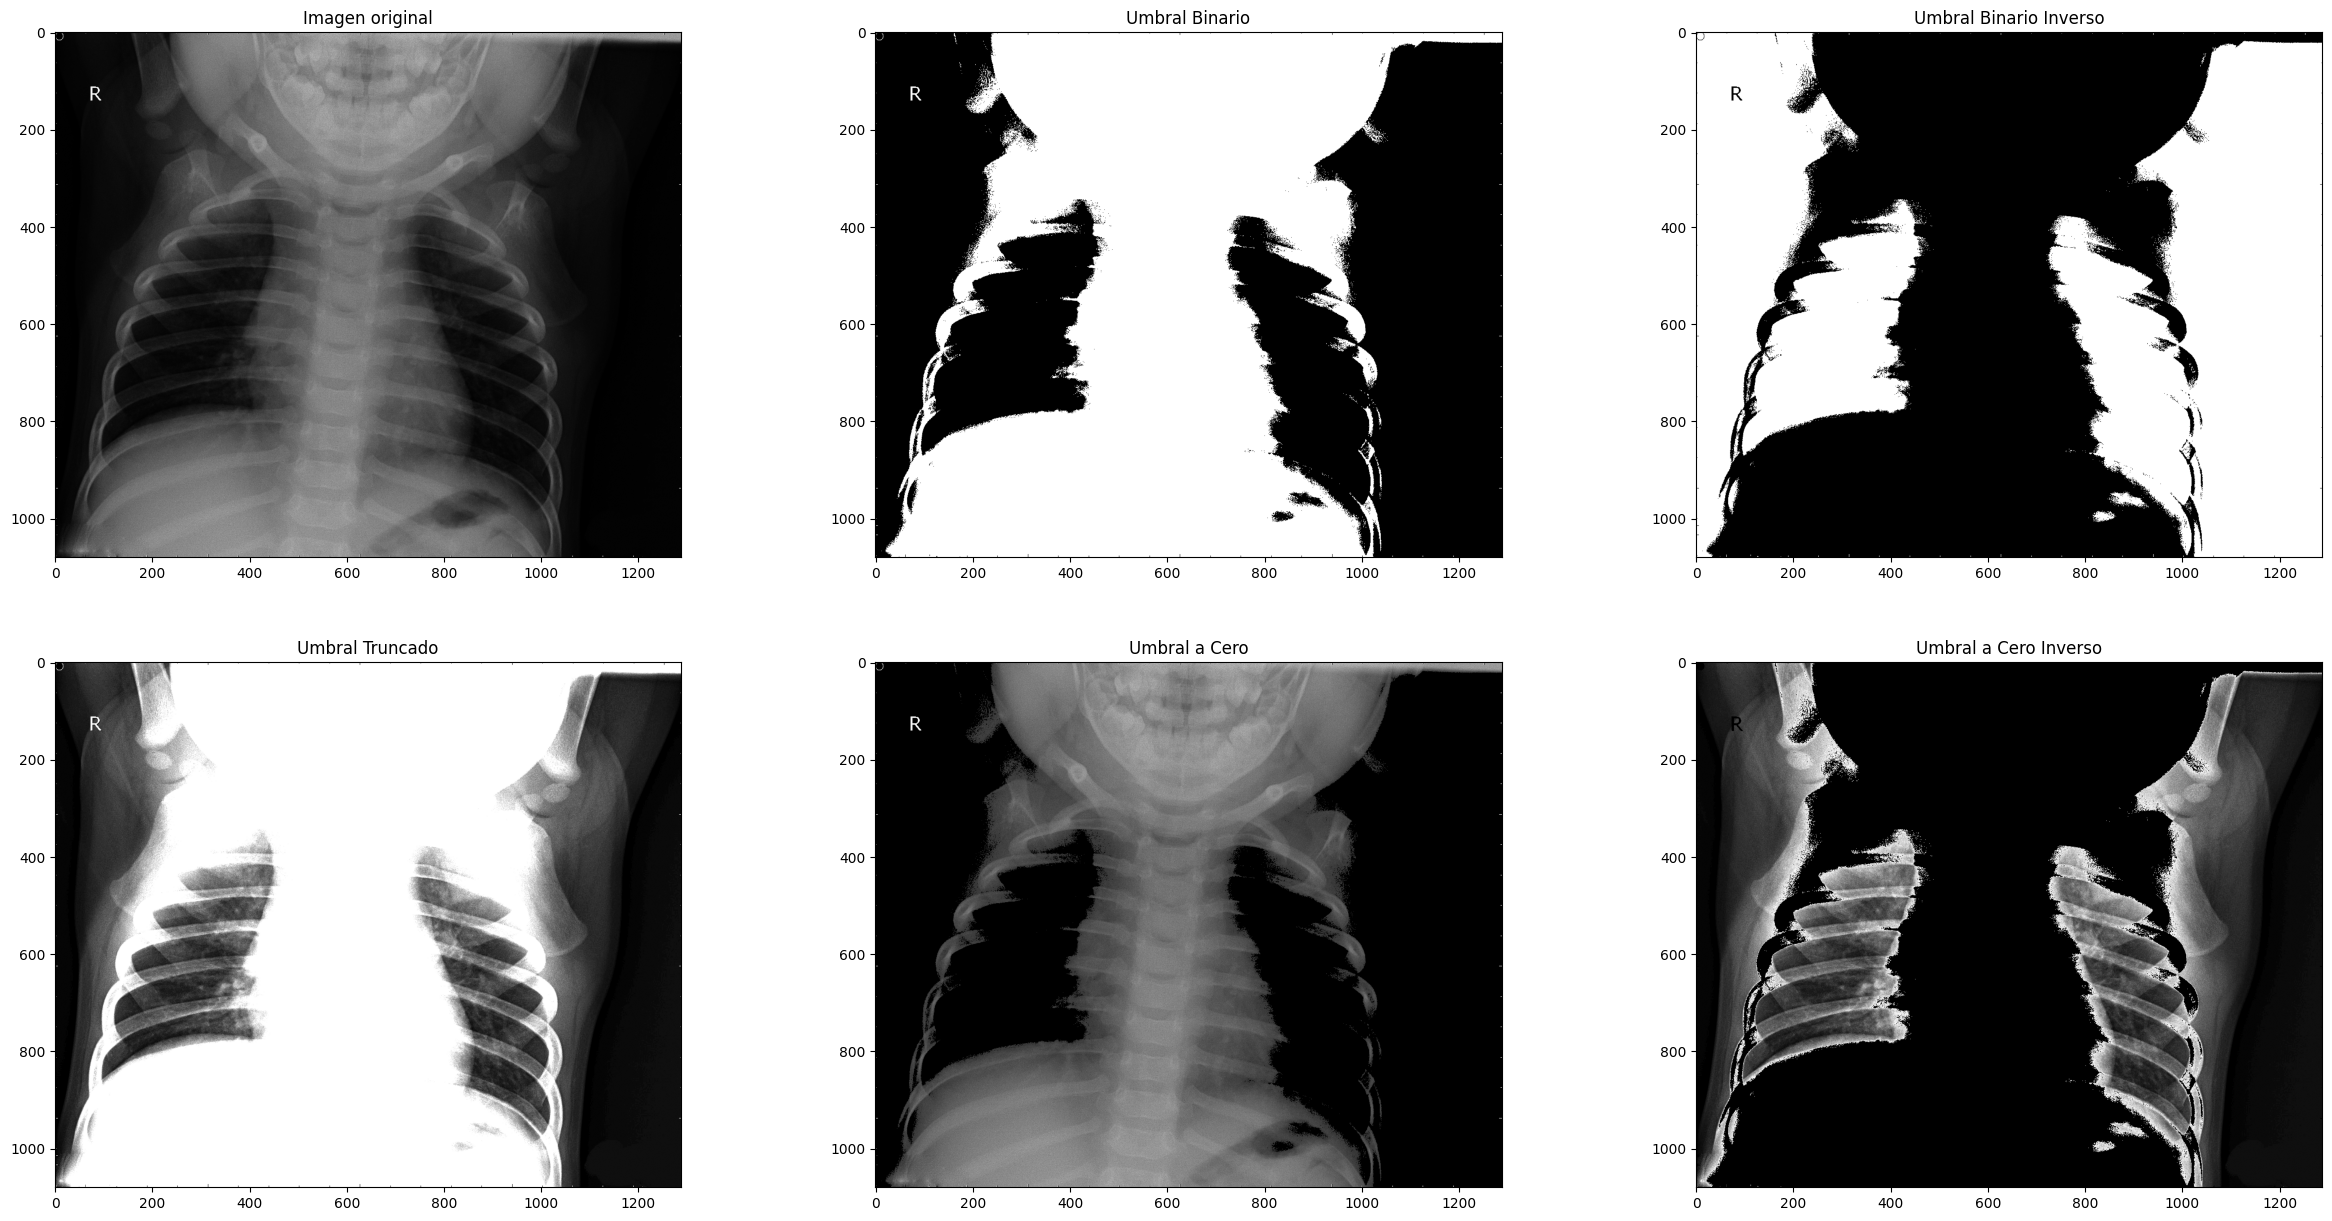

In [46]:
def aplicar_thresholds_and(img, threshold_value=50):
    """
    Aplica diferentes técnicas de umbralización a una imagen en escala de grises
    y muestra los resultados utilizando subplots.

    Parámetros:
    ----------
    img : numpy.ndarray
        Imagen en escala de grises sobre la cual se aplicarán las técnicas de umbralización.
    threshold_value : int, opcional
        Valor del umbral para las técnicas de umbralización. El valor por defecto es 100.

    Retorno:
    -------
    None
        La función no retorna ningún valor. Los resultados se muestran en una figura con subplots.
    """
    # Aplicar umbralización utilizando diferentes métodos
    _, thresh_binary = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY)
    _, thresh_binary_inv = cv2.threshold(img, threshold_value, 255, cv2.THRESH_BINARY_INV)
    _, thresh_trunc = cv2.threshold(img, threshold_value, 255, cv2.THRESH_TRUNC)
    _, thresh_tozero = cv2.threshold(img, threshold_value, 255, cv2.THRESH_TOZERO)
    _, thresh_tozero_inv = cv2.threshold(img, threshold_value, 255, cv2.THRESH_TOZERO_INV)

    # Crear subplots para mostrar la imagen original y los resultados de umbralización
    fig, axs = plt.subplots(2, 3, figsize=(30, 15))
    axs[0, 0].imshow(img, cmap='gray')
    axs[0, 0].title.set_text("Imagen original")

    axs[0, 1].imshow(thresh_binary, cmap='gray')
    axs[0, 1].title.set_text("Umbral Binario")

    axs[0, 2].imshow(thresh_binary_inv, cmap='gray')
    axs[0, 2].title.set_text("Umbral Binario Inverso")

    axs[1, 0].imshow(thresh_trunc, cmap='gray')
    axs[1, 0].title.set_text("Umbral Truncado")

    axs[1, 1].imshow(thresh_tozero, cmap='gray')
    axs[1, 1].title.set_text("Umbral a Cero")

    axs[1, 2].imshow(thresh_tozero_inv, cmap='gray')
    axs[1, 2].title.set_text("Umbral a Cero Inverso")

    # Mostrar la figura con subplots
    plt.show()
#aplicar_thresholds_and(gamma_correction(img_normal,1,2))
aplicar_thresholds_and(gamma_correction(img_normal,1,2))

## Definir el valor del Treshold
diferentes tipo de blancura, adjust_image lleva la blancura promedio 130, y se encuentra el promedio de los valores no nulos

### ADJUST_IMAGE

Media imagen normal: 111.83019097258432
Media imagen normal con blancura ajustada: 129.77294326547045
Media imagen neumonía: 126.73504748391501
Media imagen neumonía con blancura ajustada: 129.03327222797333


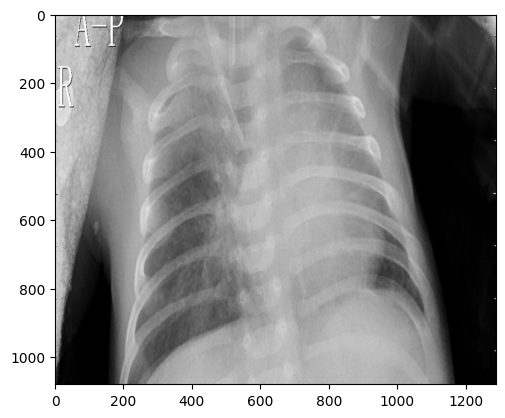

In [47]:
import numpy as np
import matplotlib.pyplot as plt

def mean_non_zero(image):
    """
    Calcula la media de los valores de intensidad de una imagen en escala de grises,
    excluyendo los píxeles con valor cero.
    """
    non_zero_pixels = image[image > 0]
    return np.mean(non_zero_pixels) if non_zero_pixels.size > 0 else 0

# se ajusta los niveles de blancura para apliar un mismo valor de treshold
def adjust_image(image, reference_value=130, tolerance=1, max_iterations=2):
    """
    Ajusta los valores de los píxeles de una imagen en escala de grises para acercarse a un valor de referencia.
    """
    adjusted_image = image.copy()

    for _ in range(max_iterations):
        mean_value = mean_non_zero(adjusted_image)
        diff = reference_value - mean_value

        if abs(diff) <= tolerance:
            break

        # Ajustar cada píxel en función de la diferencia
        adjusted_image = adjusted_image + diff
        #adjusted_image=gamma_correction(adjusted_image,1,1/diff)

        # Asegurar que los valores de los píxeles estén en el rango [0, 255]
        adjusted_image = np.clip(adjusted_image, 0, 255).astype(np.uint8)

    return adjusted_image

# Ejemplo de uso
print("Media imagen normal:",mean_non_zero(img_normal))
print("Media imagen normal con blancura ajustada:",mean_non_zero(adjust_image(img_normal)))
print("Media imagen neumonía:",mean_non_zero(img_neu))
print("Media imagen neumonía con blancura ajustada:",mean_non_zero(adjust_image(img_neu)))

plt.imshow(adjust_image(img_neu), cmap='gray')

## Transformación:
threshold , morfologicas, y aplicación de mascara para
hacer la función que resalta la zona de interes

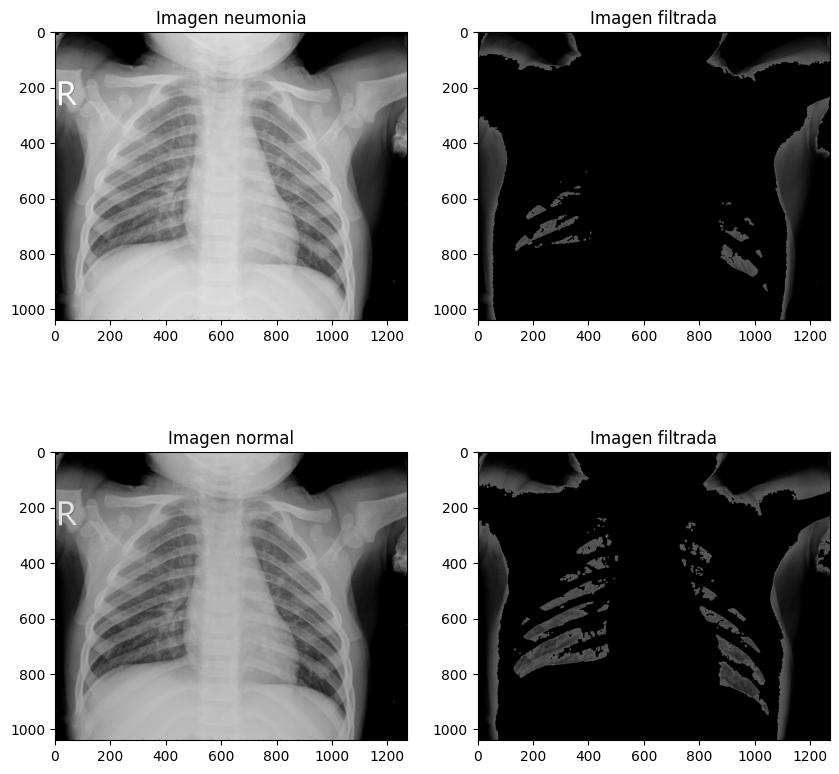

In [48]:
def aplicar_tresh(img):
  tresh = 100
  shape_kernel = 5
  res , tresh1 = cv2.threshold(img, tresh, 255, cv2.THRESH_BINARY_INV)
  kernel = np.ones((shape_kernel,shape_kernel),np.uint8)
  #cv2.dilate(img,kernel,iterations = 1)
  img_dilate = cv2.morphologyEx(tresh1, cv2.MORPH_OPEN, kernel)
  img1= cv2.bitwise_and(img_dilate,img)
  return img1
img_normal= cv2.imread(path+"/val/NORMAL/NORMAL2-IM-1430-0001.jpeg",cv2.IMREAD_COLOR)


fig , axs = plt.subplots(2,2,figsize=(10,10))
axs[0,0].imshow(img_normal, cmap = 'gray')
axs[0,1].imshow(aplicar_tresh(img_normal), cmap = 'gray')
axs[0,0].title.set_text("Imagen neumonia")
axs[0,1].title.set_text("Imagen filtrada")
axs[1,0].imshow(adjust_image(img_normal), cmap = 'gray')
axs[1,1].imshow(aplicar_tresh(adjust_image(img_normal)), cmap = 'gray')
axs[1,0].title.set_text("Imagen normal")
axs[1,1].title.set_text("Imagen filtrada")

#

#Segmentación

##definir función que aplica transformaciones morfologicas, aplicación de mascara  y etiquetas de areas y eliminar areas grandes

### PROCESAR IMAGEN

Tono medio de píxeles no nulos img normal: 152.3818503454149
Tono medio de píxeles no nulos img normal procesada: 89.33849086290155
Tono medio de píxeles no nulos img neumonía: 117.08772151966458
Tono medio de píxeles no nulos img neumonía procesada: 109.9804587380622


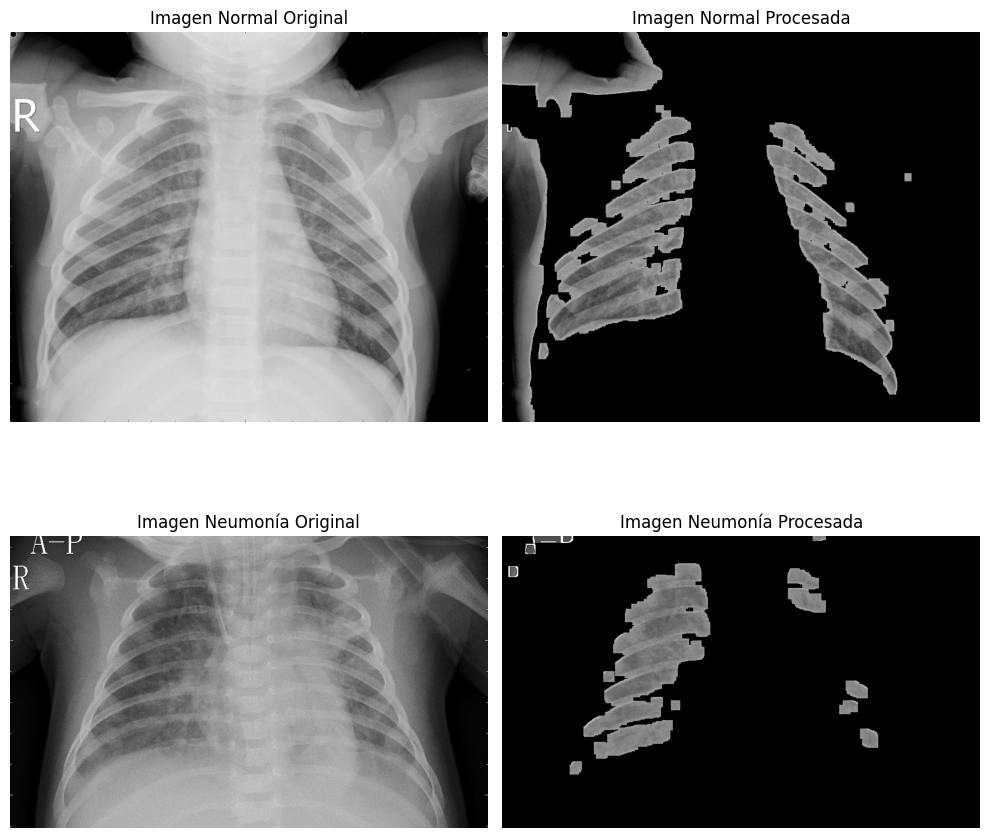

In [49]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.measure import regionprops, label

def procesar_imagen(img_normal, umbral=130, num_areas=2, kernel_size=(7, 7)):
    """
    Procesa una imagen eliminando las áreas más grandes después de binarizarla y aplicando una operación morfológica.

    Args:
    - img_normal (numpy.ndarray): Imagen original en escala de grises.
    - umbral (int, opcional): Valor de umbral para binarizar la imagen. Por defecto es 110.
    - num_areas (int, opcional): Número de áreas más grandes a eliminar. Por defecto es 2.
    - kernel_size (tuple, opcional): Tamaño del kernel para la operación morfológica. Por defecto es (7, 7).

    Returns:
    - img_resultado (numpy.ndarray): Imagen final procesada.
    """
    # Igualar brillo/contraste de la imagen
    img_normal = adjust_image(img_normal)

    # Binarizar la imagen
    _, img_binarizada = cv2.threshold(img_normal, umbral, 255, cv2.THRESH_BINARY_INV)

    # Aplicar dos erosiones para reducir ruido antes del etiquetado
    kernel = np.ones(kernel_size, np.uint8)
    img_binarizada = cv2.erode(img_binarizada, kernel, iterations=2)

    # Etiquetar las regiones conectadas en la imagen erosionada
    labeled_img = label(img_binarizada)

    # Obtener las propiedades de las regiones etiquetadas
    regions = regionprops(labeled_img)

    # Ordenar las regiones por área en orden descendente y eliminar las más grandes
    mask = np.ones(img_binarizada.shape, dtype=bool)
    for region in sorted(regions, key=lambda x: x.area, reverse=True)[:num_areas]:
        for coord in region.coords:
            mask[coord[0], coord[1]] = False

    # Aplicar la máscara para eliminar las áreas más grandes
    img_filtrada = img_binarizada.copy()
    img_filtrada[~mask] = 0
    # Aplicar dilatación para recuperar forma tras erosiones
    img_filtrada = cv2.dilate(img_filtrada, kernel, iterations=3)

    # Aplicar la máscara a la imagen original
    img_resultado = cv2.bitwise_and(img_filtrada, img_normal)

    return img_resultado

img_normal = cv2.imread(path + "/val/NORMAL/NORMAL2-IM-1430-0001.jpeg", cv2.IMREAD_GRAYSCALE)
img_neumonia = cv2.imread(path + "/val/PNEUMONIA/person1946_bacteria_4874.jpeg", cv2.IMREAD_GRAYSCALE)

# Procesar ambas imágenes
img_normal_procesada = procesar_imagen(img_normal)
img_neumonia_procesada = procesar_imagen(img_neumonia)

# Calcular el tono medio de los píxeles no nulos
print("Tono medio de píxeles no nulos img normal:", mean_non_zero(img_normal))
print("Tono medio de píxeles no nulos img normal procesada:", mean_non_zero(img_normal_procesada))
print("Tono medio de píxeles no nulos img neumonía:", mean_non_zero(img_neumonia))
print("Tono medio de píxeles no nulos img neumonía procesada:", mean_non_zero(img_neumonia_procesada))

# Aplicar corrección gamma a las imágenes procesadas
img_normal_corregida = gamma_correction(img_normal_procesada, 1, 0.8)
img_neumonia_corregida = gamma_correction(img_neumonia_procesada, 1, 0.8)

# Comparar todas las imágenes: normal, normal procesada, neumonía, neumonía procesada
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Mostrar las imágenes en una cuadrícula 2x2
axes[0, 0].imshow(img_normal, cmap='gray')
axes[0, 0].set_title('Imagen Normal Original')
axes[0, 0].axis('off')

axes[0, 1].imshow(img_normal_corregida, cmap='gray')
axes[0, 1].set_title('Imagen Normal Procesada')
axes[0, 1].axis('off')

axes[1, 0].imshow(img_neumonia, cmap='gray')
axes[1, 0].set_title('Imagen Neumonía Original')
axes[1, 0].axis('off')

axes[1, 1].imshow(img_neumonia_corregida, cmap='gray')
axes[1, 1].set_title('Imagen Neumonía Procesada')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

##OJO NO CORRER


## Determinar feature relevantes

In [50]:
import os
import cv2
import numpy as np
import pandas as pd
import scipy.stats
from skimage import morphology
from skimage.measure import label, regionprops
from multiprocessing import Pool

# Función para redondear a cifras significativas
def round_to_sig_figs(value, sig_figs):
    # Check if the value is NaN or zero to avoid errors
    if np.isnan(value) or value == 0:
        return 0
    else:
        return round(value, sig_figs - int(np.floor(np.log10(abs(value)))) - 1)

# Función para extraer características de una imagen
def extract_features(img):
    features = {}

    # Procesamiento morfológico
    img_processed = morphology.remove_small_objects(img.astype(bool), min_size=20)
    label_img = label(img_processed)
    props = regionprops(label_img)

    # Hu Moments
    moments = cv2.moments(img)
    hu_moments = cv2.HuMoments(moments).flatten()
    for i in range(7):
        features[f'hu{i}'] = round_to_sig_figs(np.sign(hu_moments[i]) * np.log(np.abs(hu_moments[i]) + 1e-10), 6)

    # Intensidad promedio
    avg_intensity = np.mean(img[img > 0])
    features['avg_intensity'] = round_to_sig_figs(avg_intensity, 6)

    # Histograma
    hist = cv2.calcHist([img], [0], None, [256], [0, 256]).flatten()
    features.update({
        'hist_mean': round_to_sig_figs(np.mean(hist), 6),
        'hist_std': round_to_sig_figs(np.std(hist), 6),
        'hist_skewness': round_to_sig_figs(scipy.stats.skew(hist), 6),
        'hist_kurtosis': round_to_sig_figs(scipy.stats.kurtosis(hist), 6)
    })

    # Bordes y densidad de bordes
    edges = cv2.Canny(img, 100, 200)
    features['edge_density'] = round_to_sig_figs(np.sum(edges) / img.size, 6)

    # Transformada de Fourier
    f_transform_shifted = np.fft.fftshift(np.fft.fft2(img))
    magnitude_spectrum = 20 * np.log(np.abs(f_transform_shifted) + 1e-10)
    features.update({
        'fourier_mean': round_to_sig_figs(np.mean(magnitude_spectrum), 6),
        'fourier_std': round_to_sig_figs(np.std(magnitude_spectrum), 6)
    })

    # Eccentricidad y área
    contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        contour = max(contours, key=cv2.contourArea)
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)
        compactness = (4 * np.pi * area) / (perimeter ** 2) if perimeter > 0 else 0
        features.update({
            'area': round_to_sig_figs(area, 6),
            'eccentricity': round_to_sig_figs(compactness, 6)
        })
    else:
        features.update({'area': 0, 'eccentricity': 0})

    return features


### Variables más correlacionadas  en valro absoluto

# Reconocimiento de patrones


juntar dataset y mezclarlos , y definir X_train X_test , y_train y_test



In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
path = "/content/drive/MyDrive/12 semestre/Vision Artificial/actividades/Proyecto VA/CSV/"
df_normales = pd.read_csv(path+'imagenes_normal_train.csv')
df_neumonia = pd.read_csv(path+'imagenes_neumonia_train.csv')
# Combina los DataFrames
df_combined = pd.concat([df_normales, df_neumonia], ignore_index=True)
df_shuffled = df_combined.sample(frac=0.8, random_state=11).reset_index(drop=True)
columns_to_drop = ['filename', 'hu4', 'hu5', 'hu6', 'edge_density', 'eccentricity', 'hist_skewness','avg_intensity','hist_skewness']
df_shuffled = df_shuffled.drop(columns=columns_to_drop)

X = df_shuffled.drop('label', axis=1)  # Características
y = df_shuffled['label']  # Etiquetas
#Reemplaza las comas por puntos en todo el DataFrame antes de entrenar
for col in X.columns:
    X[col] = X[col].replace(',', '.', regex=True).astype(float)

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

print(y_train)

3887    1
2946    1
601     1
3513    1
1909    1
       ..
332     1
1293    1
4023    1
3775    0
1945    1
Name: label, Length: 3338, dtype: int64


## métricas
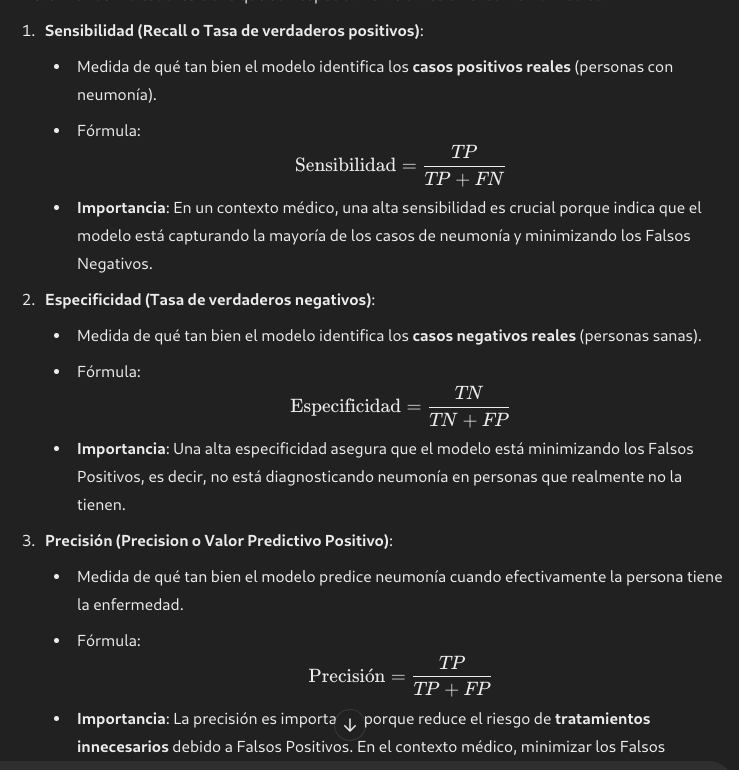 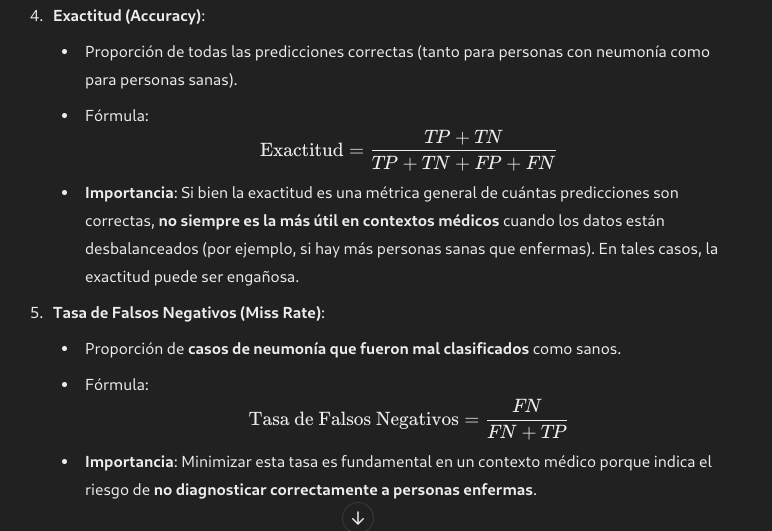


##Modelos de clasificación Normal vs Neumonia

### Arbol de decisiones

Precisión del modelo (Exactitud): 1.0
Sensibilidad (Recall): 1.00
Precisión (Precision): 1.00
Especificidad: 1.00
Tasa de Falsos Negativos (Miss Rate): 0.00


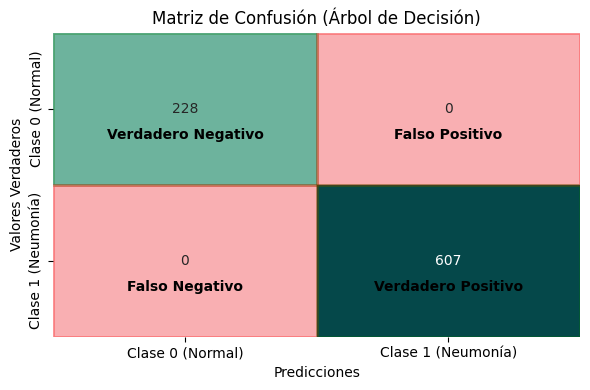

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Crea un clasificador de árbol de decisión
clf_normal = DecisionTreeClassifier()

# Entrena el modelo con los datos de entrenamiento
clf_normal.fit(X_train, y_train)


# Realiza predicciones con los datos de prueba
y_pred = clf_normal.predict(X_test)

# Calcula la precisión del modelo (exactitud)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo (Exactitud):", accuracy)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Extraer valores de la matriz de confusión
TN, FP, FN, TP = conf_matrix.ravel()  # Verdaderos Negativos, Falsos Positivos, Falsos Negativos, Verdaderos Positivos

# Cálculo de los parámetros

# Sensibilidad (Recall)
sensibilidad = TP / (TP + FN)
print(f"Sensibilidad (Recall): {sensibilidad:.2f}")

# Precisión (Precision)
precision = TP / (TP + FP)
print(f"Precisión (Precision): {precision:.2f}")

# Especificidad
especificidad = TN / (TN + FP)
print(f"Especificidad: {especificidad:.2f}")

# Tasa de Falsos Negativos (Miss Rate)
miss_rate = FN / (FN + TP)
print(f"Tasa de Falsos Negativos (Miss Rate): {miss_rate:.2f}")

# Visualizar la matriz de confusión
labels = np.array([['Verdadero Negativo', 'Falso Positivo'],
                   ['Falso Negativo', 'Verdadero Positivo']])

# Crear una figura para la matriz de confusión
fig, ax = plt.subplots(figsize=(6, 4))

# Crear el mapa de calor de la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Clase 0 (Normal)', 'Clase 1 (Neumonía)'], yticklabels=['Clase 0 (Normal)', 'Clase 1 (Neumonía)'], ax=ax)

# Añadir colores personalizados para cada cuadrante
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        # Colores: verde para positivos (TP, TN), rojo para negativos (FP, FN)
        color = 'green' if (i == j) else 'red'
        ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=True, edgecolor=color, lw=2, facecolor=color, alpha=0.3))

        # Añadir el texto descriptivo (TP, TN, FP, FN) en negro
        ax.text(j + 0.5, i + 0.7, labels[i, j], color='black',
                fontsize=10, fontweight='bold', ha='center')

plt.title("Matriz de Confusión (Árbol de Decisión)")
plt.xlabel("Predicciones")
plt.ylabel("Valores Verdaderos")
plt.tight_layout()
plt.show()


Interpretación de los casos:
**Verdadero Positivo (TP):**
El modelo predijo Neumonía y la persona realmente tiene neumonía.
Este es un acierto del modelo en identificar correctamente un paciente con neumonía.
**Falso Positivo (FP):**
El modelo predijo Neumonía, pero la persona no tiene neumonía (es normal).
Esto se considera un error porque genera falsas alarmas. En un contexto médico, esto puede llevar a tratamientos innecesarios.
**Verdadero Negativo (TN):**
El modelo predijo Normal y la persona realmente es normal.
Este es otro acierto del modelo, donde identifica correctamente a un paciente sano.
**Falso Negativo (FN):**
El modelo predijo Normal, pero la persona realmente tiene neumonía.
Este es un error crítico en un contexto médico porque significa que el modelo falló en detectar un caso de neumonía, lo que puede tener graves consecuencias si el paciente no recibe tratamiento.


### Regresión Logisitca

Precisión del modelo (Regresión Logística): 1.0
Sensibilidad (Recall): 1.00
Precisión (Precision): 1.00
Especificidad: 1.00
Tasa de Falsos Negativos (Miss Rate): 0.00


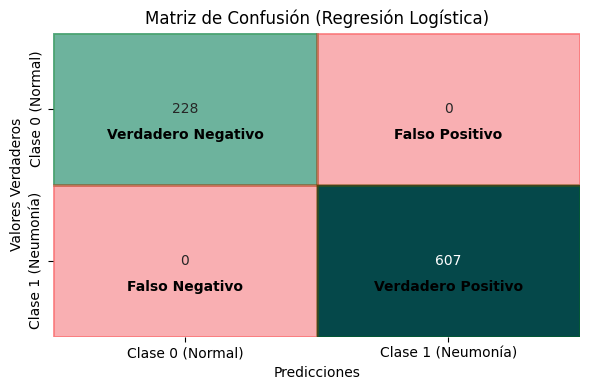

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Crea un clasificador de regresión logística
clf_log_normal = LogisticRegression(max_iter=1000)  # Aumentar max_iter si obtienes un error de convergencia

# Entrena el modelo con los datos de entrenamiento
clf_log_normal.fit(X_train, y_train)

# Realiza predicciones con los datos de prueba
y_pred = clf_log_normal.predict(X_test)

# Calcula la precisión del modelo (Exactitud)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo (Regresión Logística):", accuracy)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Extraer valores de la matriz de confusión
TN, FP, FN, TP = conf_matrix.ravel()  # Verdaderos Negativos, Falsos Positivos, Falsos Negativos, Verdaderos Positivos

# Cálculo de los parámetros

# Sensibilidad (Recall)
sensibilidad = TP / (TP + FN)
print(f"Sensibilidad (Recall): {sensibilidad:.2f}")

# Precisión (Precision)
precision = TP / (TP + FP)
print(f"Precisión (Precision): {precision:.2f}")

# Especificidad
especificidad = TN / (TN + FP)
print(f"Especificidad: {especificidad:.2f}")

# Tasa de Falsos Negativos (Miss Rate)
miss_rate = FN / (FN + TP)
print(f"Tasa de Falsos Negativos (Miss Rate): {miss_rate:.2f}")

# Visualizar la matriz de confusión con colores para cada cuadrante
labels = np.array([['Verdadero Negativo', 'Falso Positivo'],
                   ['Falso Negativo', 'Verdadero Positivo']])

# Crear una figura para la matriz de confusión
fig, ax = plt.subplots(figsize=(6, 4))

# Crear el mapa de calor de la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Clase 0 (Normal)', 'Clase 1 (Neumonía)'],
            yticklabels=['Clase 0 (Normal)', 'Clase 1 (Neumonía)'], ax=ax)

# Añadir colores personalizados para cada cuadrante
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        # Colores: verde para positivos (TP, TN), rojo para negativos (FP, FN)
        color = 'green' if (i == j) else 'red'
        ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=True, edgecolor=color, lw=2, facecolor=color, alpha=0.3))

        # Añadir el texto descriptivo (TP, TN, FP, FN) en negro
        ax.text(j + 0.5, i + 0.7, labels[i, j], color='black',
                fontsize=10, fontweight='bold', ha='center')

plt.title("Matriz de Confusión (Regresión Logística)")
plt.xlabel("Predicciones")
plt.ylabel("Valores Verdaderos")
plt.tight_layout()
plt.show()


###KNeighborsClassifier

Precisión del modelo (KNN): 0.8479041916167664
Sensibilidad (Recall): 0.90
Precisión (Precision): 0.89
Especificidad: 0.71
Tasa de Falsos Negativos (Miss Rate): 0.10


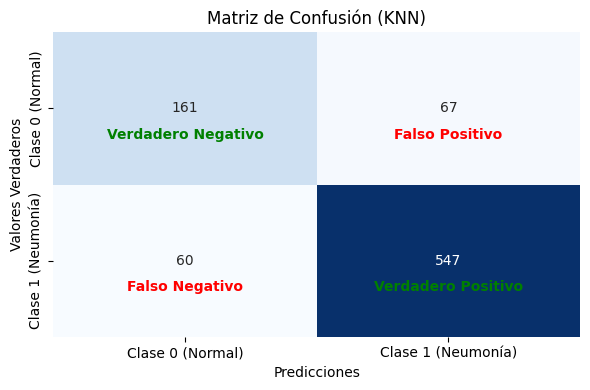

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Crea un clasificador KNN
knn_clf_normal = KNeighborsClassifier(n_neighbors=5)

# Entrena el modelo con los datos de entrenamiento
knn_clf_normal.fit(X_train, y_train)

# Realiza predicciones con los datos de prueba
y_pred = knn_clf_normal.predict(X_test)

# Calcula la precisión del modelo (Exactitud)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo (KNN):", accuracy)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Extraer valores de la matriz de confusión
TN, FP, FN, TP = conf_matrix.ravel()  # Verdaderos Negativos, Falsos Positivos, Falsos Negativos, Verdaderos Positivos

# Cálculo de los parámetros

# Sensibilidad (Recall)
sensibilidad = TP / (TP + FN)
print(f"Sensibilidad (Recall): {sensibilidad:.2f}")

# Precisión (Precision)
precision = TP / (TP + FP)
print(f"Precisión (Precision): {precision:.2f}")

# Especificidad
especificidad = TN / (TN + FP)
print(f"Especificidad: {especificidad:.2f}")

# Tasa de Falsos Negativos (Miss Rate)
miss_rate = FN / (FN + TP)
print(f"Tasa de Falsos Negativos (Miss Rate): {miss_rate:.2f}")

# Etiquetas personalizadas para cada celda
labels = np.array([['Verdadero Negativo', 'Falso Positivo'],
                   ['Falso Negativo', 'Verdadero Positivo']])

# Colores para positivos (verde) y negativos (rojo)
colors = np.array([['green', 'red'],
                   ['red', 'green']])

# Visualizar la matriz de confusión con anotaciones personalizadas
plt.figure(figsize=(6, 4))
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                 xticklabels=['Clase 0 (Normal)', 'Clase 1 (Neumonía)'], yticklabels=['Clase 0 (Normal)', 'Clase 1 (Neumonía)'])

# Añadir anotaciones personalizadas con los textos TP, TN, FP, FN
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(j + 0.5, i + 0.7, labels[i, j], color=colors[i, j],
                fontsize=10, fontweight='bold', ha='center')

plt.title("Matriz de Confusión (KNN)")
plt.xlabel("Predicciones")
plt.ylabel("Valores Verdaderos")
plt.tight_layout()
plt.show()


## Modelos clasificación Virus vs bacteriana

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import pandas as pd
path = "/content/drive/MyDrive/12 semestre/Vision Artificial/actividades/Proyecto VA/CSV/"
df_neumonia = pd.read_csv(path+'imagenes_neumonia_train.csv')
print(df_neumonia)

          hu0      hu1      hu2      hu3      hu4      hu5      hu6  \
0    -537.128  -12.178 -190.577 -194.374 -230.259 -229.748  230.259   
1    -495.693  -11.203 -168.893  -18.141 -230.258 -230.087 -230.258   
2    -499.745 -108.356 -150.973 -165.876 -230.258 -225.583  230.258   
3    -508.645 -128.569 -175.471 -182.555 -230.258 -228.677  230.258   
4    -477.296 -107.125 -172.018 -172.054 -230.258  223.486  230.258   
...       ...      ...      ...      ...      ...      ...      ...   
3870 -299.832 -735.487 -122.022  -97.572 -206.404 -135.883 -228.965   
3871 -460.452 -107.032 -159.927 -157.741 -230.257 -213.239 -230.258   
3872 -483.376 -112.538  -14.775 -159.518 -230.256 -217.552 -230.257   
3873 -490.829 -122.439 -156.385 -162.742 -230.258 -221.462  230.258   
3874 -499.178 -118.503 -163.729 -175.396 -230.258 -229.859  230.258   

      avg_intensity  hist_mean  hist_std  hist_skewness  hist_kurtosis  \
0           108.833    3246.50   41760.8        158.875        250.609   

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split # Added this line to import the missing function
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# prompt: df neumonia si en filename  hay alguna palabra=  virus cambiar label a 2  , y si bacteria = 3
def update_label(row):
  if 'virus' in row['filename']:
    return 2
  elif 'bacteria' in row['filename']:
    return 3
  else:
    return row['label']

df_neumonia['label'] = df_neumonia.apply(update_label, axis=1)
#'hu4', 'hu5', 'hu6', 'edge_density', 'eccentricity', 'hist_skewness','avg_intensity','hist_skewness'
#columns_to_drop = ['filename']
columns_to_drop = ['filename', 'hu4', 'hu5', 'hu6', 'edge_density', 'eccentricity', 'hist_skewness','avg_intensity','hist_skewness']
#columns_to_drop = ['filename']
df_shuffled = df_neumonia.drop(columns=columns_to_drop)
# Suponiendo que tu DataFrame 'df_shuffled' tiene una columna llamada 'label' que indica la clase
X = df_shuffled.drop('label', axis=1)  # Características
y = df_shuffled['label']  # Etiquetas
#Reemplaza las comas por puntos en todo el DataFrame antes de entrenar
for col in X.columns:
    X[col] = X[col].replace(',', '.', regex=True).astype(float)

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

print(y_train)

1419    3
3741    3
2120    3
1198    2
1039    3
       ..
3409    2
3163    3
1104    3
3775    3
1945    3
Name: label, Length: 3100, dtype: int64


### KNeighborsClassifier

Precisión del modelo (KNN): 0.6167741935483871


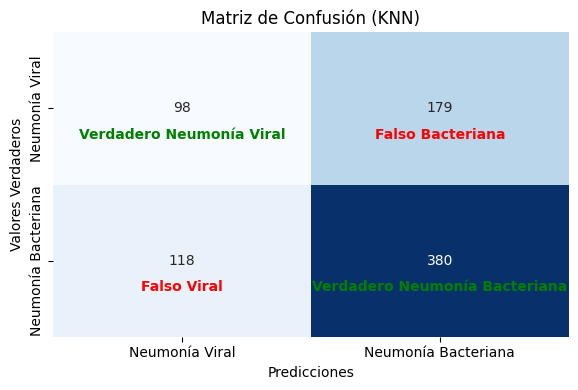

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Crea un clasificador KNN
knn_clf = KNeighborsClassifier(n_neighbors=3)

# Reemplazar las comas por puntos en los datos
X_train = X_train.replace(',', '.', regex=True)
X_test = X_test.replace(',', '.', regex=True)

# Entrena el modelo con los datos de entrenamiento
knn_clf.fit(X_train, y_train)

# Realiza predicciones con los datos de prueba
y_pred = knn_clf.predict(X_test)

# Calcula la precisión del modelo (Exactitud)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo (KNN):", accuracy)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Etiquetas personalizadas (solo para las clases 2 y 3: Viral y Bacteriana)
labels = np.array([['Verdadero Neumonía Viral', 'Falso Bacteriana'],
                   ['Falso Viral', 'Verdadero Neumonía Bacteriana']])

# Colores para positivos (verde) y negativos (rojo)
colors = np.array([['green', 'red'],
                   ['red', 'green']])

# Visualizar la matriz de confusión con anotaciones personalizadas
plt.figure(figsize=(6, 4))
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                 xticklabels=['Neumonía Viral', 'Neumonía Bacteriana'],
                 yticklabels=['Neumonía Viral', 'Neumonía Bacteriana'])

# Añadir anotaciones personalizadas con los textos y colores
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(j + 0.5, i + 0.7, labels[i, j], color=colors[i, j],
                fontsize=10, fontweight='bold', ha='center')

plt.title("Matriz de Confusión (KNN)")
plt.xlabel("Predicciones")
plt.ylabel("Valores Verdaderos")
plt.tight_layout()
plt.show()


### Árbol de decisión

Precisión del modelo (Árbol de Decisión): 0.5819354838709677


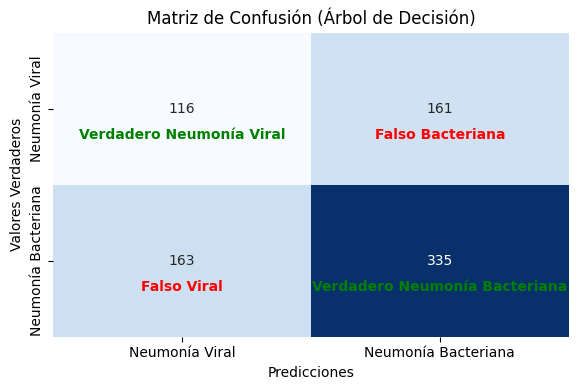

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Crea un clasificador de Árbol de Decisión
clf = DecisionTreeClassifier()

# Reemplazar las comas por puntos en los datos (si es necesario)
X_train = X_train.replace(',', '.', regex=True)
X_test = X_test.replace(',', '.', regex=True)

# Entrena el modelo con los datos de entrenamiento
clf.fit(X_train, y_train)

# Realiza predicciones con los datos de prueba
y_pred = clf.predict(X_test)

# Calcula la precisión del modelo (Exactitud)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo (Árbol de Decisión):", accuracy)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Etiquetas personalizadas (solo para las clases 2 y 3: Viral y Bacteriana)
labels = np.array([['Verdadero Neumonía Viral', 'Falso Bacteriana'],
                   ['Falso Viral', 'Verdadero Neumonía Bacteriana']])

# Colores para positivos (verde) y negativos (rojo)
colors = np.array([['green', 'red'],
                   ['red', 'green']])

# Visualizar la matriz de confusión con anotaciones personalizadas
plt.figure(figsize=(6, 4))
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                 xticklabels=['Neumonía Viral', 'Neumonía Bacteriana'],
                 yticklabels=['Neumonía Viral', 'Neumonía Bacteriana'])

# Añadir anotaciones personalizadas con los textos y colores
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(j + 0.5, i + 0.7, labels[i, j], color=colors[i, j],
                fontsize=10, fontweight='bold', ha='center')

plt.title("Matriz de Confusión (Árbol de Decisión)")
plt.xlabel("Predicciones")
plt.ylabel("Valores Verdaderos")
plt.tight_layout()
plt.show()


## Test

#probar una imagen de Validación ,es decir que no estaba ni en train ni en test

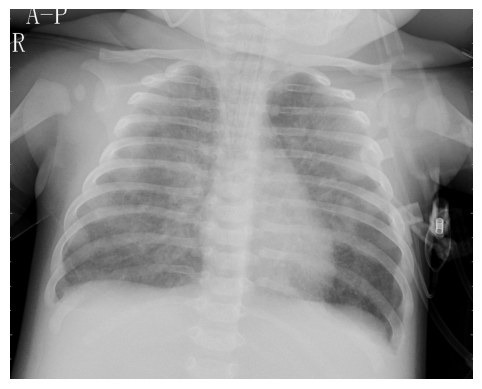

       hu0      hu1      hu2      hu3      hu4    hu5      hu6  avg_intensity  \
0 -5.04017 -10.6231 -17.6235 -17.9356 -23.0258 -22.44 -23.0258        103.259   

   hist_mean      hist_std  hist_skewness  hist_kurtosis  edge_density  \
0    4432.75  58045.398438        15.8928     250.723999       1.70579   

   fourier_mean  fourier_std     area  eccentricity  \
0       165.809      20.8382  76714.0      0.262495   

                        filename  
0  person1952_bacteria_4883.jpeg  


In [59]:
import cv2
import os
import pandas as pd

# Procesar una sola imagen
def process_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        img = procesar_imagen(img)  # Aplicar filtros
        features = extract_features(img)
        features['filename'] = os.path.basename(file_path)
        return pd.DataFrame([features])  # Devuelve un DataFrame con una fila
    return None
path = "/content/drive/MyDrive/12 semestre/Vision Artificial/actividades/Proyecto VA/chest_xray"
#img ="NORMAL/NORMAL2-IM-1431-0001.jpeg"
img ="/val/PNEUMONIA/person1952_bacteria_4883.jpeg"
df = process_image(path+img)
plt.imshow(cv2.imread(path+img, cv2.IMREAD_GRAYSCALE), cmap='gray')
plt.axis('off')
plt.show()
print(df)

In [60]:
columns_to_drop = ['filename', 'hu4', 'hu5', 'hu6', 'edge_density', 'eccentricity', 'hist_skewness','avg_intensity','hist_skewness']
#'hu4', 'hu5', 'hu6', 'edge_density', 'eccentricity', 'hist_skewness','avg_intensity','hist_skewness'

X = df.drop(columns=columns_to_drop)

#Reemplaza las comas por puntos en todo el DataFrame antes de entrenar
for col in X.columns:
    X[col] = X[col].replace(',', '.', regex=True).astype(float)
#y_pred= clf_normal.predict(X)
#y_pred= knn_clf_normal.predict(X) #modelo KNN normal vs neumonia
#y_pred= clf_log_normal.predict(X)
y_pred = knn_clf.predict(X)
print(y_pred)
if y_pred == 0:
  print("Normal")
elif y_pred == 1:
  print("Neumonía")
elif y_pred == 2:
  print("Neumonía Viral")
elif y_pred == 3:
  print("Neumonía Bacteriana")
else:
  print("No se pudo determinar la clasificación.")

[3]
Neumonía Bacteriana


In [61]:
# Importar la librería joblib (es estándar en Colab, pero se incluye por si acaso)
import joblib
import os
from google.colab import drive


PATH_SAVE = '/content/drive/MyDrive/12 semestre/Vision Artificial/actividades/Proyecto VA/Modelos_Exportados/'

# Crea la carpeta si no existe
if not os.path.exists(PATH_SAVE):
    os.makedirs(PATH_SAVE)
    print(f"Carpeta creada en: {PATH_SAVE}")

# Nombres de los archivos de modelo
filename_knn = 'knn_pneumonia_model.joblib'
filename_tree = 'decision_tree_pneumonia_model.joblib'

# 1. Exportar el modelo KNN
joblib.dump(knn_clf, os.path.join(PATH_SAVE, filename_knn))
print(f"Modelo KNN exportado con éxito a: {os.path.join(PATH_SAVE, filename_knn)}")

# 2. Exportar el modelo de Árbol de Decisión
joblib.dump(clf_normal, os.path.join(PATH_SAVE, filename_tree))
print(f"Modelo Decision Tree exportado con éxito a: {os.path.join(PATH_SAVE, filename_tree)}")

Carpeta creada en: /content/drive/MyDrive/12 semestre/Vision Artificial/actividades/Proyecto VA/Modelos_Exportados/
Modelo KNN exportado con éxito a: /content/drive/MyDrive/12 semestre/Vision Artificial/actividades/Proyecto VA/Modelos_Exportados/knn_pneumonia_model.joblib
Modelo Decision Tree exportado con éxito a: /content/drive/MyDrive/12 semestre/Vision Artificial/actividades/Proyecto VA/Modelos_Exportados/decision_tree_pneumonia_model.joblib
